In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
ts_data = pd.read_csv('./data/1-retail_daily_amount.csv', index_col='Date', parse_dates=True)
log_data = pd.read_csv('./data/2-retail_daily_amount_log.csv', index_col='Date', parse_dates=True)
log_data_r_mean = pd.read_csv('./data/2-retail_daily_amount_log_r_mean.csv', index_col='Date', parse_dates=True)
log_returns = pd.read_csv('./data/2-retail_daily_amount_log_returns.csv', index_col='Date', parse_dates=True)
df_diff = pd.read_csv('./data/2-retail_daily_amount_diff.csv', index_col='Date', parse_dates=True)

# ARMA / ARIMA / SARIMA Models


- The ARIMA model takes in three parameters:
    - 1. p is the order of the AR term
    - 2. q is the order of the MA term
    - 3. d is the number of differencing
    
    Seasonal ARIMA model. Here, the order argument specifies the
(p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal
component of the Seasonal ARIMA model.

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
import itertools
import pmdarima as pm
warnings.filterwarnings("ignore")   ##### ignore warnings 

## Autoregressive model

Next we are going to use AR(1,0,0) model, 1 for the autoregressive side, 0 for differentiation because this series has already no trend and no seasonality and 0 for number of lags for the moving average. It is a regressive prosses of order one.

In [4]:
# Now we want to check our data with this simple ARIMA(1,0,0) model
mod1 = ARIMA(df_diff, order=(1,0,0))
result1=mod1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                  595
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -595.321
Date:                Sat, 19 Jun 2021   AIC                           1196.641
Time:                        18:26:15   BIC                           1209.807
Sample:                             0   HQIC                          1201.768
                                - 595                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.019      0.144      0.886      -0.034       0.039
ar.L1         -0.4643      0.035    -13.370      0.000      -0.532      -0.396
sigma2         0.4329      0.020     21.948      0.000       0.394       0.472
===================================================================================
Ljung-Box (Q):                      294.57   Jarque-Bera (JB):                44.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.20
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

P.Valeu is bigger than 0.05 in the constant, we don’t reject the null hypothesis, H0 test the coefficient equal 0, then we can say the constant is null. In the autoregressive L1, P.Valeu is smaller than 0.05, we can say we reject the null hypothesis, the estimated coefficient is 0. W can conclude the autoregressive term of order 1 is statistically significant.

## ARIMA Model

Next, we are going to do a ARIMA (0,0,1) model, using moving average of 1 lag for the residual term. Zero for the autoregressive side, 0 for the integration side and 1 lag for moving average.

In [6]:
# Now we want to check our data with this simple ARIMA(0,0,1) model
mod2 = ARIMA(df_diff, order=(0,0,1))
result2=mod2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                  595
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -518.185
Date:                Sat, 19 Jun 2021   AIC                           1042.370
Time:                        18:27:17   BIC                           1055.535
Sample:                             0   HQIC                          1047.497
                                - 595                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.664      0.507      -0.000       0.000
ma.L1         -0.9997      0.167     -5.981      0.000      -1.327      -0.672
sigma2         0.3305      0.058      5.678      0.000       0.216       0.445
===================================================================================
Ljung-Box (Q):                      182.43   Jarque-Bera (JB):                27.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.12
Prob(H) (two-sided):                  0.94   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Again the constant is null, but we don't regect the term moving average because P.valeu is 0.

## ARMA Model

Next, we are going to do ARMA model (1,0,1), autoregressive model with moving average with 1 lag.

In [7]:
# Now we want to check our data with this simple ARIMA(1,0,1) model
mod3 = ARIMA(df_diff, order=(1,0,1))
result3=mod3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                  595
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -510.414
Date:                Sat, 19 Jun 2021   AIC                           1028.828
Time:                        18:27:25   BIC                           1046.382
Sample:                             0   HQIC                          1035.664
                                - 595                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.576      0.565      -0.000       0.001
ar.L1          0.1620      0.038      4.211      0.000       0.087       0.237
ma.L1         -0.9999      0.802     -1.247      0.212      -2.571       0.572
sigma2         0.3223      0.260      1.242      0.214      -0.186       0.831
===================================================================================
Ljung-Box (Q):                      169.87   Jarque-Bera (JB):                30.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.16
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the comparison of information criteria, the Third model has lower AIC and HQIC, using this criteria the second model could be better.

- The final part of modelling a time series is to study the residuals.
- Ideally, the residuals will be white noise, with no autocorrelation.
- A good way to test this is to use the Ljung-Box test. Note that this test can only be applied to the residuals.
- Here, the null hypothesis for the Ljung-Box test is that there is no autocorrelation.
- White noise, by definition, is random data. A time series is white noise(random) if the variables are independent and identically distributed(i.i.d) with a mean of zero. In other words, the time series has a mean μ = 0 and a constant standard deviation σ = c.

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Ljung-Box test
acorr_ljungbox(result3.resid, lags=[2], return_df=True)

,lb_stat,lb_pvalue
2,2.951099,0.228653


We don’t reject the null, the residuals are independent.

In [9]:
# forecast one out-of-sample value
ff = result3.forecast(steps=1, alpha=0.05)
ff

595   -1.509924
dtype: float64

In [10]:
df_diff1=df_diff.copy()

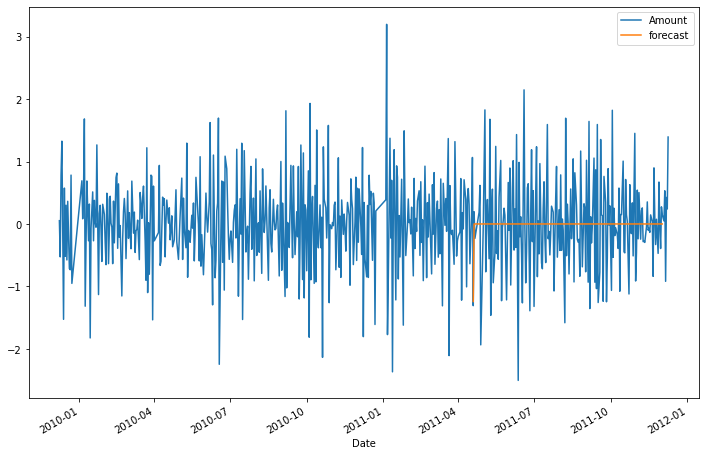

In [11]:
df_diff1['forecast']=result2.predict(start=400,end=588,dynamic=True)
df_diff1[['Amount','forecast']].plot(figsize=(12,8))

Now, the ideal would be to invert the logarithm and differentiation we did, but the model does not look exceptional, so we are going perform a Auto Arima and Sarimax model. 

# Autosarma model with original data

In [12]:
#ts_data= original data
#log_data= logarithmic data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use original data. 

In [13]:
data=ts_data.copy()

In [14]:
# packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller, kpss    ##### unit root test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm    ##### auto-arima
import warnings
warnings.filterwarnings("ignore")   ##### ignore warnings  

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 602 entries, 2009-12-01 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  602 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


<Figure size 432x288 with 0 Axes>

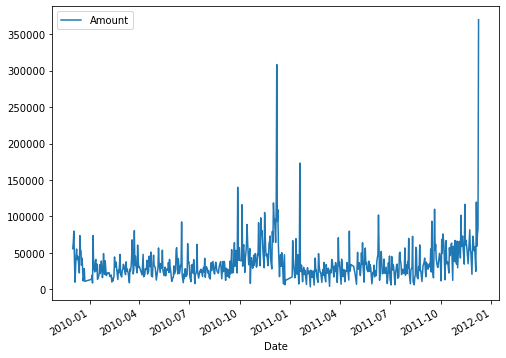

In [16]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [17]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [18]:
# number of observations in the test set with 'shape'
test_data.shape

(185,)

In [19]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 0.000888585841622309
We reject the H0: stationary time series <-> we don't have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARMA model. We are going to star with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 6 and for moving average is 6. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0, because according with D-fuller test the training series was stationary, and in fact in test the model had better results when we use differentiation 0 compared with 1. For se seasonal side we use D equal 1. 

In [20]:
# fit stepwise autoARMA with seasonality (sarma)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=6, max_q=6, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=9325.566, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9527.776, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9387.440, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9361.393, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9526.008, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=9467.131, Time=0.18 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=9323.998, Time=2.30 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=9377.717, Time=0.57 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=9329.014, Time=3.22 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=6.65 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=9327.258, Time=3.01 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=9357.876, Time=3.27 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=9330.010, Time=5.30 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=9362.158, Time=0.79 sec
 ARIMA(1,0,0)(1,1,1)[12]

According with this package pm Arima, the best model is an Sarima. For trend side with 2 lags for the autoregressive, without differentiation and two lags in the error term for moving average. For the seasonal side we have 0 lags for autoregressive and one lag for the moving average.  

In [21]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  417
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -4653.660
Date:                              Sat, 19 Jun 2021   AIC                           9319.319
Time:                                      18:29:44   BIC                           9343.342
Sample:                                           0   HQIC                          9328.828
                                              - 417                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0061      0.125      0.049      0.961      -0.240       0.252
ar.L2          0.8043      0.106      7.594      0.000       0.597       1.012
ma.L1          0.2610      0.136      1.915      0.056      -0.006       0.528
ma.L2         -0.6613      0.094     -7.064      0.000      -0.845      -0.478
ma.S.L12      -0.8279      0.052    -15.923      0.000      -0.930      -0.726
sigma2      8.074e+08   1.33e-10   6.07e+18      0.000    8.07e+08    8.07e+08
===================================================================================
Ljung-Box (Q):                       52.00   Jarque-Bera (JB):             15662.10
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               5.03   Skew:                             3.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.67e+34. Standard errors may be unstable.
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
Autoregressive with lag 1 and moving average with lag 1 has p.valeu bigger than 0.05, this variable are not statistically significant, don't bring contribution to the target. The situation is not the ideal, because not all variables are statistically significant, for two variables we don´t reject the hypothesis that the coefficient is null.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

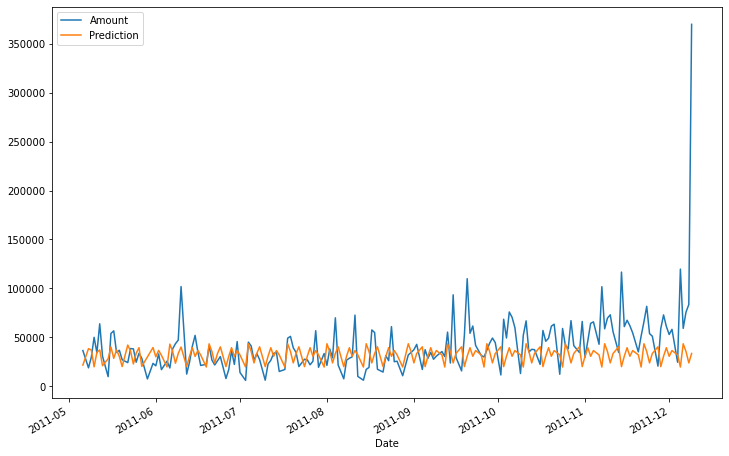

In [23]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 185 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(12,8))
plt.show()

We can see that the model had reasonable  performance until Christmas time time, but was not able to predict the Christmas time sales period in a efficient way. 

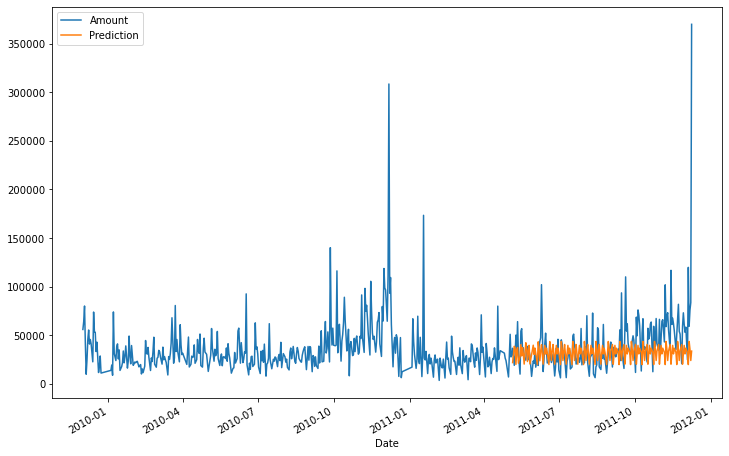

In [25]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(12,8))

In [26]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=185, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 1210538148.3584573
SMAPE: 47.77302624893639


In [27]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 51.00%


We can see that the mean absolute percentage error for the forecast is high. We did try different configurations of parameters in the model and different ways to split the train and test data, but the performance was not god in any of them. So, we are going to try different models, we are going to use the log returns data for the next model. 

# Autosarima model with log returns data (first difference)

In [28]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use log returns data with the first difference.

In [29]:
data=log_returns.copy()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601 entries, 2009-12-02 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  601 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


<Figure size 432x288 with 0 Axes>

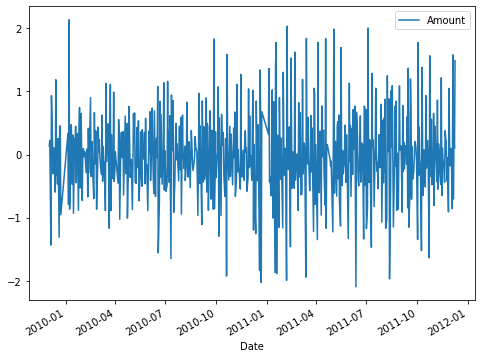

In [32]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [33]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [34]:
# number of observations in the test set with 'shape'
test_data.shape

(184,)

In [35]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 2.7952010049308344e-12
We reject the H0: stationary time series <-> we don't have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARIMA model. We are going to start with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 6 and for moving average is 6. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0, because according with D-fuller test the training series was stationary, and in fact in test the model had better results when we use differentiation 0 compared with 1. For se seasonal side we use D equal 1. 

In [36]:
# fit stepwise autoARIMA with seasonality (sarima)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=6, max_q=6, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=616.138, Time=2.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=907.580, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=769.227, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=621.846, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=905.583, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=616.195, Time=2.29 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=616.442, Time=8.70 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=674.237, Time=2.20 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=617.845, Time=10.48 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=715.722, Time=0.84 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=617.971, Time=3.93 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=616.577, Time=3.64 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=783.621, Time=0.43 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept  

According with this package pm Arima, the best model is an Sarima. For trend side with 0 lags for the autoregressive, without differentiation and two lags in the error term for moving average. For the seasonal side we have 0 lags for autoregressive and one lag for the moving average.  

In [37]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  417
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -302.954
Date:                              Sat, 19 Jun 2021   AIC                            613.908
Time:                                      18:33:21   BIC                            629.924
Sample:                                           0   HQIC                           620.248
                                              - 417                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7172      0.049    -14.688      0.000      -0.813      -0.621
ma.L2         -0.1521      0.048     -3.200      0.001      -0.245      -0.059
ma.S.L12      -0.7756      0.035    -22.257      0.000      -0.844      -0.707
sigma2         0.2533      0.013     19.467      0.000       0.228       0.279
===================================================================================
Ljung-Box (Q):                       56.02   Jarque-Bera (JB):                59.56
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
All variables are statisticaly significant.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

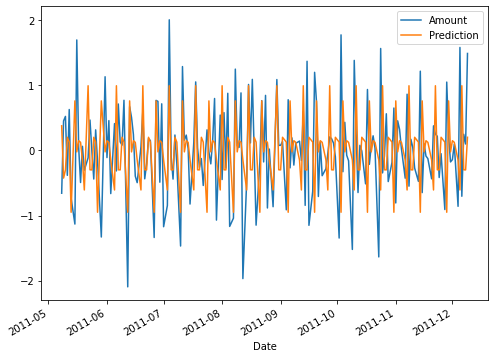

In [38]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 184 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(8, 6))
plt.show()

Removing the trend, we can see that our model has etter performance. 

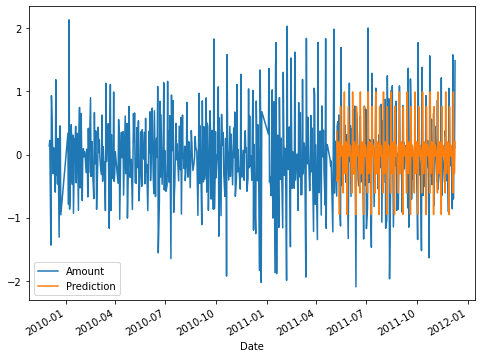

In [40]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(8, 6))

In [41]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=184, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 0.7540873553297172
SMAPE: 146.84121944251783


In [42]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 232.20%


Visual our model looks better but,  we can see that the mean absolute percentage error for the forecast is Worst than the previous model . So, we are going to try different models, we are going to use the differentiation of order 12 data for the next model. 

# Autosarima model with log returns and differentiation of order 6

In [88]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)


Now, we ar going to use the data data with log returns and differentiation of order 6.

In [89]:
data=df_diff.copy()

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 595 entries, 2009-12-08 to 2011-12-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  595 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


<Figure size 864x576 with 0 Axes>

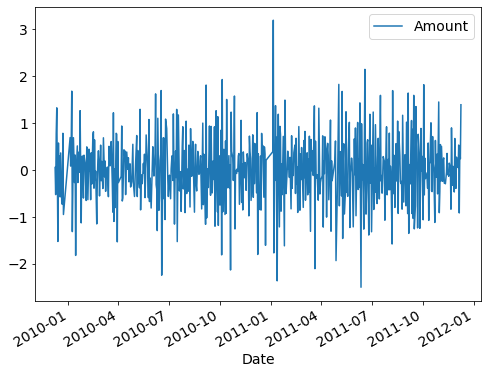

In [91]:
# plot both time series
plt.figure() 
data.plot(figsize=(8, 6))
plt.show()
# bad plot - time series with different scale

In [92]:
# Create Training and Test
data=data['Amount']

train_data = data[:417]   
test_data = data[417:]

In [93]:
# number of observations in the test set with 'shape'
test_data.shape

(178,)

In [94]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(train_data)
print("p-value =", test1[1])

if test1[1]> 0.05:
    print("We do not reject the H0: non-stationary time series <-> we have a unit root")
else:
    print("We reject the H0: stationary time series <-> we don't have a unit root")

p-value = 2.306311901841485e-16
We reject the H0: stationary time series <-> we don't have a unit root


When we split in train and test according with D-fuller test we have a stationary time series, this situation may be due to the fact that training time series miss the last Christmas time where sales is very high.  In the next Autoarima we did try with differentiation 1 and 0, in fact we had better results with differentiation 0 when testing in test data. 

Now we are going to perform a SARIMA model. We are going to star with autoregressive side p index equal to 1, moving average we are going to star in 1, maximum value for autoregressive side is 6 and for moving average is 6. M is for seasonality, we did use 12 because before we sow in the graphic that seems to be a monthly seasonality, in fact with the value 12 the model had the best performance in test data. 
In the seasonal side we did use 0 for the autoregressive side. Differentiation we did use 0, because Because the data has already a differentiation of order 12.

In [95]:
# fit stepwise autoARIMA with seasonality (sarima)
# we use 'auto_arima' function from pdmarima package (abreviated pm)
# best fitted model based on AIC

stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=6, max_q=6, m=12,
start_P=0, seasonal=True,d=0, D=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1168.664, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=976.204, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1166.664, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1088.101, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=928.222, Time=0.49 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1038.204, Time=0.36 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=901.067, Time=0.59 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=950.597, Time=0.32 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=900.457, T

According with this package pm Arima, the best model is an Sarima. For trend side with 5 lags for the autoregressive, without differentiation and 0 lags in the error term for moving average. For the seasonal side we have 2 lags for autoregressive and 1 lag for the moving average.  

In [96]:
# best fitted model output
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  417
Model:             SARIMAX(6, 0, 4)x(2, 1, [], 12)   Log Likelihood                -367.709
Date:                             Sat, 19 Jun 2021   AIC                            763.417
Time:                                     18:02:31   BIC                            819.472
Sample:                                          0   HQIC                           785.605
                                             - 417                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.166e-05      0.001     -0.049      0.961      -0.002       0.002
ar.L1         -0.1837      0.106     -1.728      0.084      -0.392       0.025
ar.L2          0.0765      0.124      0.619      0.536      -0.166       0.319
ar.L3         -0.2216      0.112     -1.978      0.048      -0.441      -0.002
ar.L4          0.0291      0.058      0.501      0.616      -0.085       0.143
ar.L5          0.1000      0.056      1.801      0.072      -0.009       0.209
ar.L6         -0.3900      0.050     -7.840      0.000      -0.487      -0.292
ma.L1         -0.5768      0.115     -4.997      0.000      -0.803      -0.351
ma.L2         -0.3177      0.128     -2.486      0.013      -0.568      -0.067
ma.L3          0.3253      0.122      2.672      0.008       0.087       0.564
ma.L4         -0.4101      0.129     -3.188      0.001      -0.662      -0.158
ar.S.L12      -0.8599      0.054    -16.010      0.000      -0.965      -0.755
ar.S.L24      -0.4286      0.055     -7.741      0.000      -0.537      -0.320
sigma2         0.3405      0.023     14.661      0.000       0.295       0.386
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                18.71
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model is an Sarimax with 417 observations, the information criteria BIC, AIC and HQIC should be as low as possible. 
All variables are statisticaly significant.
Residuals are independent (we do not reject Ljung-Box H0: residuals are independent), there is no serial correlation. 
Residuals are heteroskedastic or variance is not constant (we reject H0: variance is constant).
Residuals are not Gaussian (we reject Jarque-Bera H0: normal distribution).

Only the first presupposition of residual independency is verified but is enough to make the prevision.  

Now let’s check the performance of the model in the test dataset, for unknown values. We are going to make a prevision on the test dataset. 

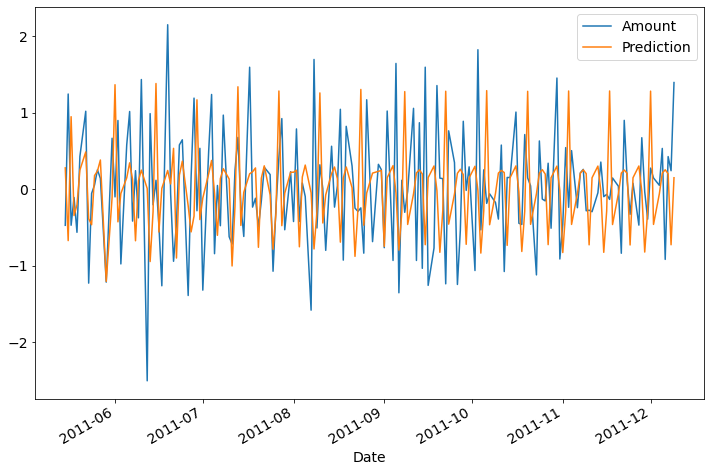

In [97]:
# since residuals are independent -> Box_Jenkins -> we can do some forecast
# forecast (out-of-sample) 184 future values by using best fitted model on the train set

future_forecast = stepwise_fit.predict(n_periods=len(test_data))

# join the forecasted value and the test_data values in the same dataframe and plot both

future_forecast = pd.DataFrame(future_forecast,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot(figsize=(8, 6))
plt.show()

Removing the trend, we can see that our model has simmilar performace with the last one. Let’s check the performance measures. 

<AxesSubplot:xlabel='Date'>

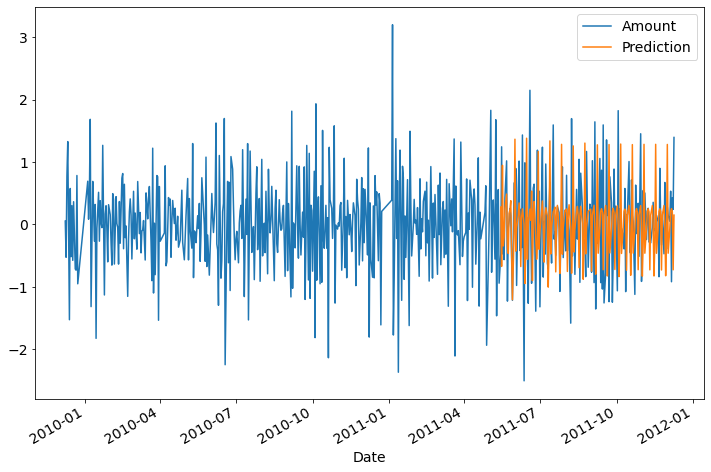

In [98]:
# plot original gdp time series and the forecast (last 185 values)
pd.concat([data,future_forecast],axis=1).plot(figsize=(8, 6))

In [99]:
# forecast performance metrics
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model=stepwise_fit
forecasts, conf_int = model.predict(n_periods=178, return_conf_int=True)
    
print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")
print(f"SMAPE: {smape(test_data, forecasts)}")

Mean squared error: 0.8331648865375991
SMAPE: 145.6320647417154


In [100]:
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test_data.values - forecasts) / test_data.values)) * 100

print('The Mean Absolute Percentage Error for the forecast is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast is 278.25%


We can see that the mean absolute percentage error for the forecast is almost the same compared with le last one.

Our error is still very high, so in the next model we are going to try a new away to solve the problem. Time series is non-stationary, we can make it stationary this by first differencing the siries. 
Seasonal data can be diferenced by subtracting the observation from the same time in the previous cycle, in this case the same
day in the previous week.

# Arima model with differentiation of order 6

In [53]:
#ts_data= original data
#ts_data_r_mean=original data with smothing and moving average
#log_data_r_mean = log data with Moving Average and Smoothing 
#log_returns = log and returns (no trend but has seasonality)
#Df_diff = (no trend and no seasonality)
dataset=np.exp(log_data_r_mean)
dataset.to_csv("./data/dataset.csv")

In [55]:
series = pd.read_csv('./data/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

ADF Statistic: -5.987563
p-value: 0.000000
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


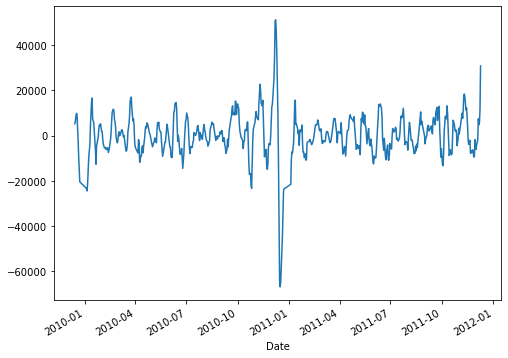

In [67]:
# create and summarize stationary version of time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
series = pd.read_csv('./data/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
# difference data
days_in_week = 6
stationary = difference(X, days_in_week)
stationary.index = series.index[days_in_week:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('./data/stationary.csv', header=False)
# plot
stationary.plot(figsize=(8, 6))
pyplot.show()

The trend was removed but we still can see some seasonality in the graph, but according with   ADF test we are ready to start modelling.  
P.valeu is slamer than 0.05, this suggests that we can reject the null hypothesis with a signicance level of 0.05%. Rejecting the null hypothesis means that
the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [59]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [62]:
# evaluate weekly configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('./data/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    days_in_week = 6
    diff = difference(history, days_in_week)
# predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days_in_week)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
print(f"Mean squared error: {mean_squared_error(test, predictions)}")
print(f"SMAPE: {smape(test, predictions)}")
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test - predictions) / test)) * 100

>Predicted=65045.979, Expected=81488.539
RMSE: 4411.830
Mean squared error: 19464240.684467226
SMAPE: 10.249394307206012


Next we are going to make a gird with parameters, to make the training process to look in the gird for the nest parameters to create our model.       

In [64]:
# grid search ARIMA parameters for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        days_in_week = 6
        diff = difference(history, days_in_week)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, days_in_week)
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# load dataset
series = pd.read_csv('./data/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=6626.007
ARIMA(0, 1, 1) RMSE=4439.998
ARIMA(0, 1, 2) RMSE=4514.423
ARIMA(0, 2, 1) RMSE=4804.395
ARIMA(0, 2, 2) RMSE=4552.463
ARIMA(1, 0, 0) RMSE=4828.349
ARIMA(1, 0, 1) RMSE=4274.730
ARIMA(1, 0, 2) RMSE=4343.104
ARIMA(1, 1, 0) RMSE=4384.740
ARIMA(1, 1, 1) RMSE=4411.830
ARIMA(1, 1, 2) RMSE=4422.287
ARIMA(1, 2, 0) RMSE=4866.035
ARIMA(1, 2, 1) RMSE=4390.912
ARIMA(1, 2, 2) RMSE=4432.815
ARIMA(2, 0, 0) RMSE=4086.836
ARIMA(2, 0, 1) RMSE=3988.652
ARIMA(2, 0, 2) RMSE=3980.423
ARIMA(2, 1, 0) RMSE=4405.943
ARIMA(2, 1, 1) RMSE=4332.927
ARIMA(2, 1, 2) RMSE=4329.482
ARIMA(2, 2, 0) RMSE=4759.753
ARIMA(2, 2, 1) RMSE=4550.277
ARIMA(2, 2, 2) RMSE=4368.270
Best ARIMA(2, 0, 2) RMSE=3980.423


In [65]:
# evaluate weekly configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('./data/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    days_in_week = 6
    diff = difference(history, days_in_week)
# predict
    model = ARIMA(diff, order=(2,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days_in_week)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
print(f"Mean squared error: {mean_squared_error(test, predictions)}")
print(f"SMAPE: {smape(test, predictions)}")
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((test - predictions) / test)) * 100

>Predicted=63462.136, Expected=81488.539
RMSE: 3980.423
Mean squared error: 15843768.813746126
SMAPE: 9.042282397536088


Save the model

In [66]:
# save finalized model
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# load data
series = pd.read_csv('./data/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
days_in_week = 6
diff = difference(X, days_in_week)
# fit model
model = ARIMA(diff, order=(2,0,2))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])